In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [7]:
import warnings
warnings.filterwarnings(action='ignore') 

# Unsupervised Learning
---
## supervised Learning(지도학습) - 예측대상이 있는 모델
    1. Linearregression
    2. classification
    
## unsupervised Learning(비지도학습) - 예측대상이 없는 모델
    1. clustering(군집분석) - kmeans, hierachical, dbscan


## Kmeans

In [258]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.7, shuffle=True, random_state=0)

In [259]:
x

array([[ 2.82502924,  1.35634827],
       [ 0.35482006,  2.9172298 ],
       [ 0.73273157,  4.41323161],
       [ 0.34944349,  4.57461908],
       [ 2.84391267,  0.1417116 ],
       [ 1.83747356,  5.14545322],
       [ 2.04921553,  5.33233847],
       [ 2.50335959, -0.23420557],
       [-2.35910549,  2.56311081],
       [ 2.01804661,  5.63090975],
       [ 3.56953269,  1.83323322],
       [ 0.08583768,  2.17587119],
       [-1.97310993,  2.63979199],
       [ 0.61951355,  3.99713532],
       [-0.16486876,  4.62773491],
       [-2.18801639,  2.63084748],
       [-1.45849654,  3.32594984],
       [ 1.79684023,  0.73009824],
       [-1.61992042,  2.70942865],
       [ 2.02776955,  0.07999821],
       [ 0.50554777,  4.05210011],
       [ 2.59552091,  1.47411657],
       [ 1.19541747,  3.70592031],
       [ 1.07710058,  5.32177878],
       [-1.1621586 ,  2.51483068],
       [ 2.42156118,  0.77758123],
       [ 2.48512308,  1.54320833],
       [ 1.30223379,  3.22841675],
       [-2.94838314,

In [260]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

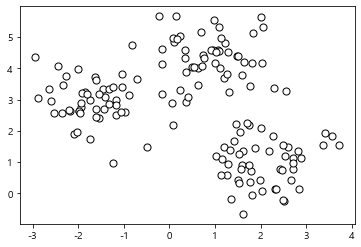

In [261]:
plt.scatter(x[:,0], x[:,1], c='white', marker='o', edgecolor='black', s=50)

In [262]:
from sklearn.cluster import KMeans
# 군집 3개, init: 중심점을 랜덤하게 지정, 구버전의 KMeans를 구동(default = KMeans++(신버전))
# max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
km = KMeans(n_clusters=3, init='random',max_iter=300, random_state=111)

y_km = km.fit_predict(x)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [263]:
# center point 좌표
km.cluster_centers_

array([[ 0.91564311,  4.37437504],
       [ 2.06919739,  0.98685826],
       [-1.62186012,  2.92416462]])

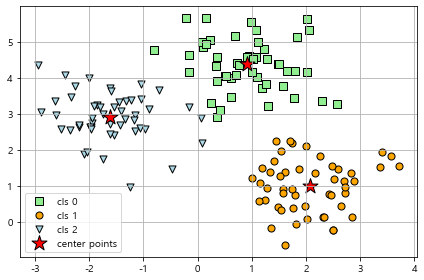

In [264]:
# 0번 cluster
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cls 0')
# 1번 cluster
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cls 1')
# 2번 cluster
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cls 2')
# center point
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s=250, c='red', marker='*', edgecolor='black', label='center points')

# loc : 위치
plt.legend(scatterpoints=1, loc=3)
# 격자 선
plt.grid()
# 여백 조정 (layout들이 서로 겹치지 않게)
plt.tight_layout()
plt.show()

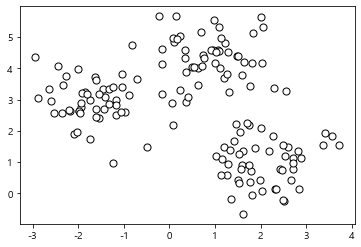

In [265]:
plt.scatter(x[:,0], x[:,1], c='white', marker='o', edgecolor='black', s=50)

In [266]:
# cluster 내부의 std값
# 작은 값일수록 데이터가 클러스터 내에서 뭉쳐있다. => 효율적인 clustering
# 임시적인 지표
km.inertia_

142.05299275153536

In [267]:
# 최적의 cluster 갯수 찾기

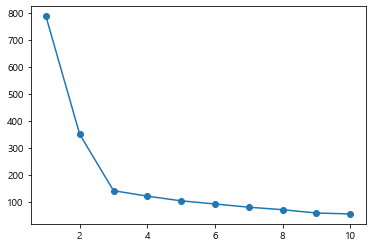

In [268]:
distoritions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='random', random_state=111)
    km.fit(x)
    distoritions.append(km.inertia_)

plt.plot(range(1,11), distoritions, marker='o')
plt.show()

In [269]:
# silhouette
# 군집 내의 데이터들이 얼마나 결합력있게 그룹핑이 되어있는지 (뭉쳐있는지)
# 군집 내의 샘플 간의 거리 -a
# 군집 간의 샘플간의 거리 계산 - b
# 군집 내의 데이터는 가까울수록 좋고, 군집 간의 데이터 거리는 멀수록 좋다
# silhouette = (b-a)/max(a,b)

In [255]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [270]:
km = KMeans(n_clusters=3, init='k-means++', random_state=111)

y_km = km.fit_predict(x)

# metric='euclidean' : 유클리드 거리 유사도
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
silhouette_vals

array([0.66832891, 0.15668637, 0.68736127, 0.60897511, 0.69748151,
       0.64782067, 0.61319169, 0.69217244, 0.70603521, 0.59319762,
       0.49392279, 0.16458834, 0.73621504, 0.61701311, 0.41927681,
       0.72446371, 0.66100984, 0.74770228, 0.72721009, 0.72872465,
       0.59931593, 0.66811292, 0.61857124, 0.65181901, 0.64403475,
       0.74866345, 0.65989759, 0.40698307, 0.46952422, 0.67738308,
       0.59088859, 0.73961144, 0.59600414, 0.70809949, 0.5386309 ,
       0.46597327, 0.57512447, 0.66847809, 0.60629512, 0.70783947,
       0.36911967, 0.62433739, 0.53298446, 0.70800501, 0.70505168,
       0.72860628, 0.52642049, 0.13766295, 0.62168787, 0.65900608,
       0.39641642, 0.56931074, 0.69154286, 0.73910612, 0.71721305,
       0.69000892, 0.47334168, 0.48824955, 0.3849225 , 0.70515411,
       0.64931592, 0.05130693, 0.73164766, 0.69619446, 0.68066722,
       0.01294871, 0.71908757, 0.31435427, 0.09536578, 0.40628372,
       0.41529146, 0.57024743, 0.72622823, 0.49563833, 0.62515

In [271]:
len(silhouette_vals)

150

In [272]:
np.mean(silhouette_vals)

0.5993444057273314

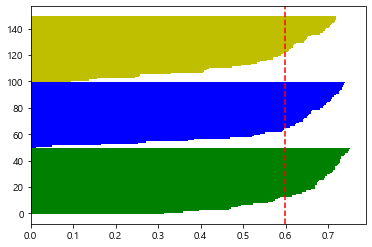

In [273]:
# silhoutte이 가장 정확한 cluster평가 지표
# 그러나 cluster의 절대적인 평가지표는 존재하지 않는다.

# 시각화를 통한 silhouette 평가
# cluster 별로 silhouette 점수가 고른지 여부 판단 - cluster의 쏠림여부
# silhouette 평균점수값

# bar chart lower, upper 변수
y_ax_lower, y_ax_upper = 0, 0
# y_ticks = []
cluster_labels = np.unique(y_km)    # 0, 1, 2
n_clusters = cluster_labels.shape[0] # 센터의 수는 3개

clist = ['g','b','y'] # green, blue, yellow

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    # upper을 len(c_silhouette_vals)으로
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor = 'none', color=clist[i])
#     y_ticks.append((y_ax_lower + y_ax_upper)/2)
    # upper값이 다음 bar차트의 lower값
    y_ax_lower += len(c_silhouette_vals)

# y의 값은 0~50(0번 그룹), 50~100(1번그룹), 100~150(2번그룹)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.show()
# cluster가 한쪽으로 몰리지않고 잘 배분되었다.

In [279]:
y_km

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

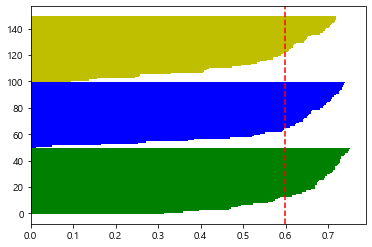

In [283]:
km = KMeans(n_clusters=3, init='k-means++', random_state=111)
y_km = km.fit_predict(x)
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
# y_ticks = []
cluster_labels = np.unique(y_km)    # 0, 1, 2
n_clusters = cluster_labels.shape[0] # 센터의 수는 3개

clist = ['g','b','y','o','p','b'] # green, blue, yellow

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    # upper을 len(c_silhouette_vals)으로
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor = 'none', color=clist[i])
#     y_ticks.append((y_ax_lower + y_ax_upper)/2)
    # upper값이 다음 bar차트의 lower값
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.show()
# cluster가 한쪽으로 몰렸다

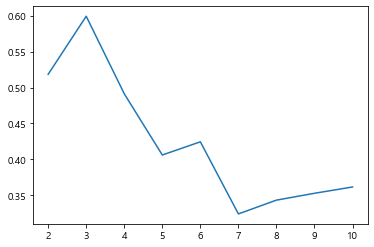

In [284]:
silhouette_list = []
# n_init: 서로 다른 군집 중심점(centroid)을 최초 셋팅한다
# max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
                max_iter=300, random_state=111)
    y_km = km.fit_predict(x)
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)
    silhouette_list.append(silhouette_avg)
    
plt.plot(range(2,11), silhouette_list)

## Hierarchical Clustering
---
* 모든 샘플들의 거리행렬을 계산
* 가장 멀리있는 개체들의 거리에 기반하여 가장 가까운 두 개의 군집을 합한다.
* 거리행렬을 다시 계산한다.
* 하나의 군집이 남을 때 까지 반복한다.
* dendrogram을 그릴 수 있다.

![hierarchical clustering](https://dashee87.github.io/images/hierarch.gif)

In [285]:
import mglearn

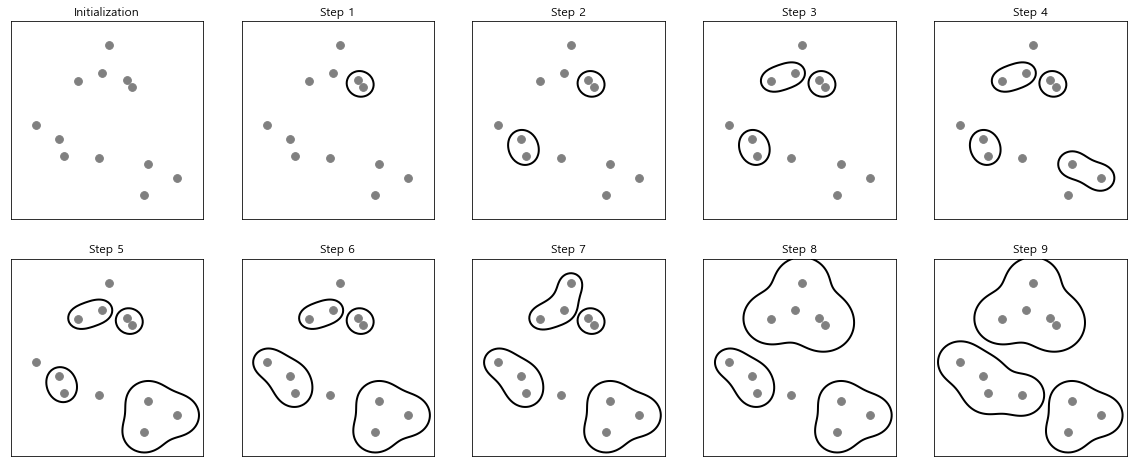

In [286]:
mglearn.plots.plot_agglomerative_algorithm()

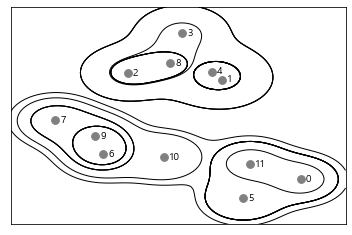

In [287]:
mglearn.plots.plot_agglomerative()

In [296]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=111)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)
assignment

array([2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2,
       0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1], dtype=int64)

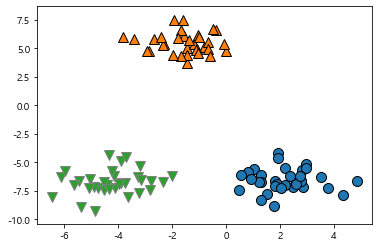

In [297]:
mglearn.discrete_scatter(x[:,0], x[:,1], assignment)

In [101]:
# dendrogram

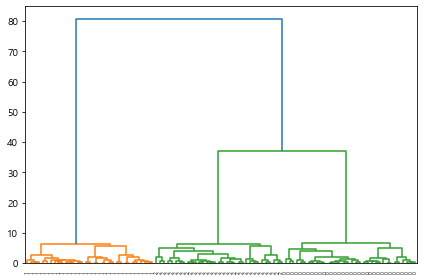

In [102]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(x)

row_dendr = dendrogram(linkage_array, labels=y)

plt.tight_layout()
plt.show()

## DBSCAN (밀도기반 클러스터링)
* 밀도 - 특정 반지름(ε) 내에서 점(데이터)들의 수
* 특정 데이터를 중심으로 반지름(ε) 내에 이웃점의 수가 설정한 수(MinPts)보다 많으면 중심
* 경계점 - ε 내에서 중심점은 아니지만 다른 중심점의 ε 범위 내에 존재하는 경우
* 잡음점 - 중심점도 경계점도 아닌 다른 모든 점
* 중심점이 다른 서로 다른 군집의 일부가 겹치면 그 군집은 서로 연결되어 하나의 군집이 된다.
* 군집의 모양에 대한 가정이 불필요하다.
* 잡음의 제거가 쉽다.
* 차원이 증가하면 부정적 영향

<!-- ![DBSCAN](https://k.kakaocdn.net/dn/b14zZg/btq5oaqGIZJ/xt4i4IyHIJ6TASOiEGkl1k/img.gif) -->

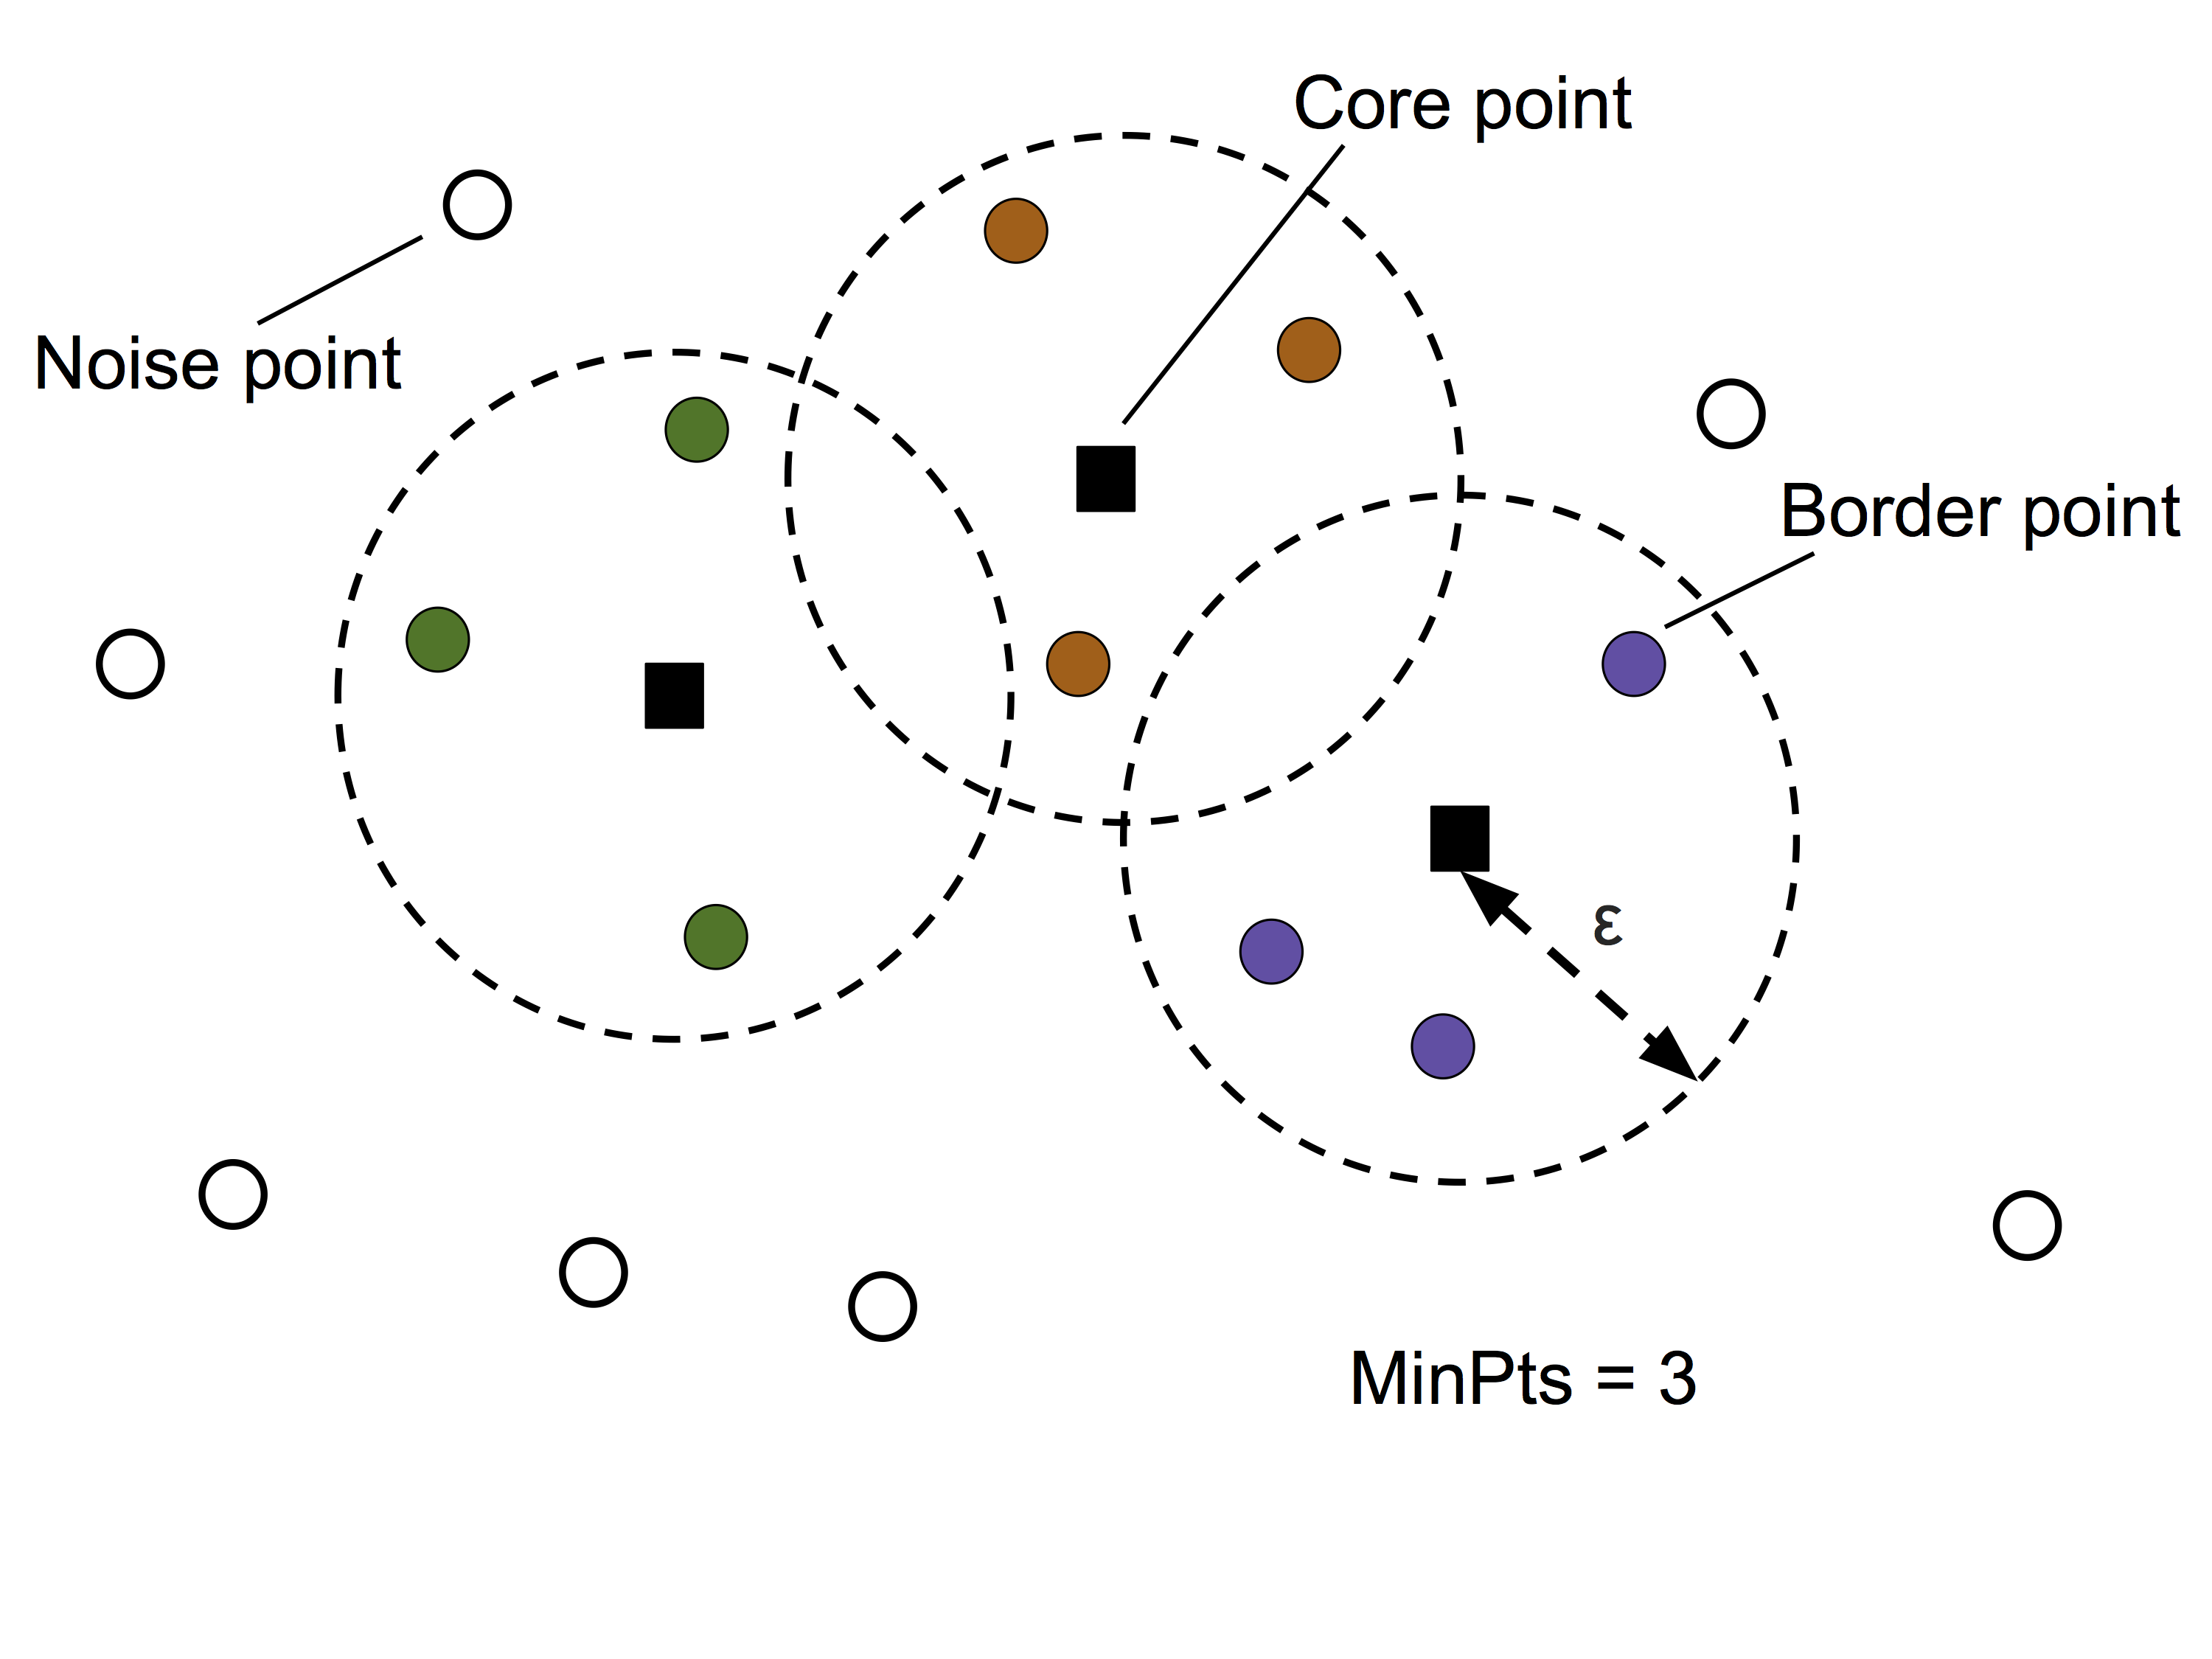

In [300]:
from IPython.display import Image
Image(filename='./ml_source_files/DBSCAN.png', width=500)

In [301]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                 shuffle=True, random_state=0)

In [303]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import silhouette_score

# ε 거리(eps): 하나의 개체를 중심으로 eps 거리 내 몇개의 점이 있는지 파악.
#            이 숫자가 정해진 밀도보다 크다면 하나의 군집을 이루게 됨. 만약 없으면 pass
# min_samples(minPts) : 클러스터를 이루는 개체의 최솟값
db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(x)
# y_db


In [304]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)
y_km = km.fit_predict(x)
# y_km

In [305]:
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(x)
# y_agg

In [306]:
print('km_sil_score :', np.mean(silhouette_samples(x, y_km, metric='euclidean')))
print('db_sil_score :', np.mean(silhouette_samples(x, y_db, metric='euclidean')))
print('agg_sil_score :', np.mean(silhouette_samples(x, y_agg, metric='euclidean')))

km_sil_score : 0.7143417887288687
db_sil_score : -0.3514480173975597
agg_sil_score : 0.7143417887288687


In [ ]:
# make_moons

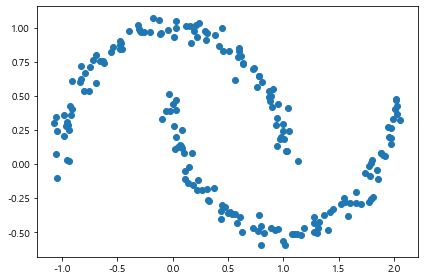

In [307]:
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=200, noise=0.05, random_state=111)
plt.scatter(x[:,0], x[:,1])
plt.tight_layout()
plt.show()

In [217]:
x

array([[ 0.43305093, -0.34233142],
       [-0.83500315,  0.60423738],
       [ 0.26795798, -0.18959203],
       [ 0.53296902, -0.36866356],
       [ 0.44932705,  0.82542244],
       [ 2.02858819,  0.36587799],
       [ 1.44427403, -0.33044962],
       [-0.74395586,  0.71037807],
       [ 2.01448882,  0.47260537],
       [ 1.80654923, -0.24330503],
       [ 1.31192927, -0.46587919],
       [ 0.7926517 , -0.45269574],
       [ 1.78698753,  0.00474381],
       [ 0.72544358,  0.6980813 ],
       [ 0.99202258,  0.29732497],
       [-0.17429806,  1.07198414],
       [ 1.42151778, -0.35084558],
       [-0.9367422 ,  0.25176746],
       [ 0.94128463,  0.33690592],
       [ 1.07729979, -0.51369479],
       [-0.93335908,  0.02532335],
       [-0.20650563,  0.97080723],
       [ 1.85670776, -0.10627873],
       [ 0.07488198,  0.13153699],
       [-0.4739937 ,  0.84410696],
       [ 0.02949995,  1.04851608],
       [ 0.20770901,  1.02050542],
       [ 1.94241858,  0.27227952],
       [ 0.29749501,

In [308]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import silhouette_score

db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(x)
# y_db

In [309]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)
y_km = km.fit_predict(x)
# y_km

In [310]:
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(x)
# y_agg

In [311]:
print('km_sil_score :', np.mean(silhouette_samples(x, y_km, metric='euclidean')))
print('db_sil_score :', np.mean(silhouette_samples(x, y_db, metric='euclidean')))
print('agg_sil_score :', np.mean(silhouette_samples(x, y_agg, metric='euclidean')))

km_sil_score : 0.42242589243687667
db_sil_score : 0.3230401867972401
agg_sil_score : 0.420925666543791


In [312]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
                            #                                     편차      / 표준편차
scaler = StandardScaler()   # 데이터 정규화(standardization) = (x - x_mean)/x_std
# scaler = MinMaxScaler()     # 데이터 표준화 (0과 1사이의 값으로 바뀜) = (x - x_min) / (x_max - x_min)
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-7.70296707e-02, -1.20457054e+00],
       [-1.52484187e+00,  7.10169872e-01],
       [-2.65526037e-01, -8.95605911e-01],
       [ 3.70527147e-02, -1.25783577e+00],
       [-5.84462665e-02,  1.15758793e+00],
       [ 1.74468940e+00,  2.28011187e-01],
       [ 1.07754344e+00, -1.18053576e+00],
       [-1.42088781e+00,  9.24873606e-01],
       [ 1.72859133e+00,  4.43901712e-01],
       [ 1.49117442e+00, -1.00425776e+00],
       [ 9.26437619e-01, -1.45448572e+00],
       [ 3.33547753e-01, -1.42781794e+00],
       [ 1.46883967e+00, -5.02499052e-01],
       [ 2.56812284e-01,  8.99999441e-01],
       [ 5.61181262e-01,  8.93406207e-02],
       [-7.70475871e-01,  1.65633840e+00],
       [ 1.05156129e+00, -1.22179317e+00],
       [-1.64100335e+00, -2.81411572e-03],
       [ 5.03250742e-01,  1.69405850e-01],
       [ 6.58547287e-01, -1.55120817e+00],
       [-1.63714064e+00, -4.60870305e-01],
       [-8.07249150e-01,  1.45167550e+00],
       [ 1.54844338e+00, -7.27077918e-01],
       [-4.

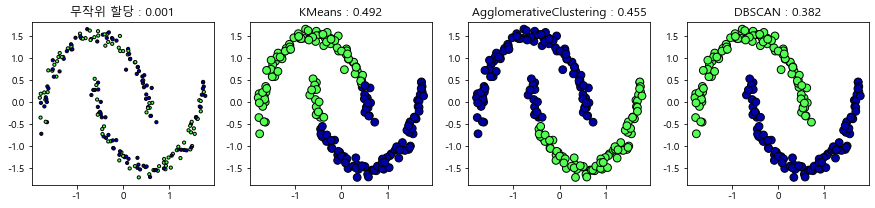

In [313]:
fig, axes = plt.subplots(1,4, figsize=(15,3))

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))
random_clusters

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
               cmap = mglearn.cm3, s=10, edgecolor='black')
axes[0].set_title('무작위 할당 : {}'.format(round(silhouette_score(x_scaled,
                                                        random_clusters), 3)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3,
              s=60, edgecolor='black')
    ax.set_title('{} : {}'.format(algorithm.__class__.__name__,
                                 round(silhouette_score(x_scaled, clusters),3)))

# 평가 지표로는 낮지만 시각적으로 확인해본 결과 DBSCAN이 가장 적합